In [1]:
#importing panda to access the dataset/plotting
import pandas as pd
#importing numpy to access the array functions
import numpy as np
#importing sklearn to remove Nan values, split the train and test set, confusion matrix, f1 score, recall
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# sklearn classifiers to import
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# model building, predict, accuracy imports
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from IPython.display import display
from tabulate import tabulate
from sklearn import metrics
import warnings
warnings.filterwarnings( 'ignore' )


In [2]:
df = pd.read_csv("weatherAUS.csv")
df=pd.DataFrame(df)
print(df.shape)
print(df.info())
df

(142193, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       8

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
def removeNull(Class):
    iterate=df[Class]
    y=[]
    mean=df[Class].mean(axis=0)
    for i in iterate:
        if(math.isnan(i)):
            y.append(mean)
        else:
            y.append(i)
    y=pd.DataFrame(y)
    df[Class]=y

def isNaN(string):
    return string != string
def removeNullCategorical(Class):
    iterate=df[Class]
    y=[]
    mostfreq=df[Class].mode()[0]
    for i in iterate:
        if(isNaN(i)):
            y.append(mostfreq)
        else:
            y.append(i)
    y=pd.DataFrame(y)
    df[Class]=y
    return y

#applying removing null
removeNull('MinTemp')
removeNull('MaxTemp')
removeNull('Pressure9am')
removeNull('Pressure3pm')
removeNull('WindSpeed9am')
removeNull('WindSpeed3pm')
removeNull('Temp9am')
removeNull('Temp3pm')
removeNull('WindGustSpeed')
removeNull('Humidity9am')
removeNull('Humidity3pm')
removeNull('Pressure9am')
removeNull('Pressure3pm')
removeNull('Cloud3pm')
removeNull('Cloud9am')
removeNull('Evaporation')
removeNull('Sunshine')
print(removeNullCategorical('RainToday'))

         0
0       No
1       No
2       No
3       No
4       No
...     ..
142188  No
142189  No
142190  No
142191  No
142192  No

[142193 rows x 1 columns]


[15838  4162]


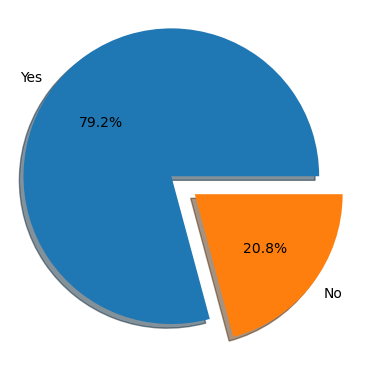

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,0,31.0,2,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,0,31.0,9,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,6,22.0,9,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,3,37.0,9,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,0.0,No


In [4]:

def labelencode(Class):
    removeNullCategorical(Class)
    temp=df[Class]
    temp=temp.to_numpy()
    temp=temp.flatten()
    LE=LabelEncoder()
    LE.fit(temp)
    array=LE.transform(temp)
    array=pd.DataFrame(array)
    df[Class]=array
labelencode('WindGustDir')
labelencode('WindDir9am')
labelencode('WindDir3pm')


X=df[['MinTemp','MaxTemp','Pressure9am','Pressure3pm','WindSpeed9am','Sunshine','Evaporation','Cloud9am','Cloud3pm',
      'Temp9am','Temp3pm','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','WindGustDir','WindDir9am','WindDir3pm']]
y=df['RainToday']

X=X.iloc[:20000]
y=y.iloc[:20000]
countss=y.value_counts().to_numpy()
labels1=['Yes','No']
myexplode = [0.2, 0] #veliya varadhuu
print(countss)
plt.pie(countss, labels = labels1,explode=myexplode,shadow=True, autopct='%1.1f%%')
plt.show()
df

In [5]:
#Z score normalization

from sklearn.preprocessing import StandardScaler

def z_score_normalization(data):
    # Initialize StandardScaler
    scaler = StandardScaler()
    
    # Fit the scaler to the data and transform the data
    normalized_data = scaler.fit_transform(data)
    
    # Convert the normalized data back to a DataFrame (if needed)
    normalized_df = pd.DataFrame(normalized_data, columns=data.columns)
    
    return normalized_df




X=pd.DataFrame(X)
normalized_data = z_score_normalization(X)
#print(X)
print(normalized_data)
x=normalized_data

        MinTemp   MaxTemp  Pressure9am  Pressure3pm  WindSpeed9am  Sunshine  \
0      0.113298 -0.215241    -1.735563    -1.414332      0.910852  -0.08128   
1     -0.889206  0.127641    -1.255404    -1.296946     -0.911057  -0.08128   
2      0.029756  0.221154    -1.752121    -1.146020      0.796982  -0.08128   
3     -0.588455  0.579620    -0.096400    -0.458471     -0.113972  -0.08128   
4      0.798342  1.249797    -1.222290    -1.598796     -0.569450  -0.08128   
...         ...       ...          ...          ...           ...       ...   
19995  0.363924  0.392594     0.748017     0.447081     -0.683319  -0.08128   
19996  0.564425  0.267910    -0.195743    -0.559088     -1.138796  -0.08128   
19997  1.099093 -0.184070     0.499659     1.017244      1.594068  -0.08128   
19998  1.015551  0.314667     1.377191     1.637715      0.796982  -0.08128   
19999  0.664675  0.018542     1.344077     1.134630     -0.569450  -0.08128   

       Evaporation  Cloud9am  Cloud3pm   Temp9am   

[15838 15838]


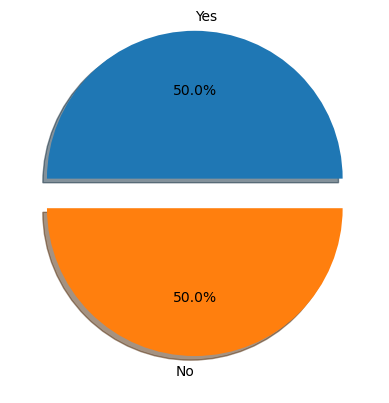

In [7]:
from imblearn.under_sampling import NearMiss

def handle_imbalance_NearMiss(X, y):
    # Initialize NearMiss
    near_miss = NearMiss(version=1)  # You can try version=2 or version=3 for different strategies
    
    # Apply NearMiss to undersample the majority class
    X_resampled, y_resampled = near_miss.fit_resample(X, y)
    
    return X_resampled, y_resampled

# Example usage:
X, y = handle_imbalance_NearMiss(X, y)

# Plot class distribution after undersampling
countss = y.value_counts().to_numpy()
labels1 = ['Yes', 'No']
myexplode = [0.2, 0]
print(countss)
plt.pie(countss, labels=labels1, explode=myexplode, shadow=True, autopct='%1.1f%%')
plt.show()

In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Number of folds
num_folds = 15

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Parameter dictionaries with corrected syntax
random_forest_params = dict(n_estimators=[25], criterion=['gini'], max_features=['sqrt'], bootstrap=[False])
decision_tree_params = dict(criterion=['entropy'], splitter=['best'], min_samples_split=[2], max_features=[None], class_weight=['balanced'])
svm_params = dict(shrinking=[False], degree=[3], class_weight=['balanced'])
neural_net_params = dict(activation=['relu'], hidden_layer_sizes=[(30,20,15,10)], max_iter=[150], solver=['adam'], learning_rate=['adaptive'], shuffle=[False])
log_reg_params = dict(class_weight=['balanced'], solver=['newton-cg'], fit_intercept=[True])
knn_params = dict(n_neighbors=[2], weights=['distance'], algorithm=['auto'], leaf_size=[5])
bagging_params = dict(n_estimators=[20], bootstrap=[True])
ada_boost_params = dict(n_estimators=[100])
guassiannb_params = dict()  # No hyperparameters for GaussianNB
gradient_boosting_params = dict(n_estimators=[50])

# List of parameter dictionaries
params = [
    random_forest_params, decision_tree_params,
    svm_params, neural_net_params, log_reg_params, knn_params,
    bagging_params, ada_boost_params, guassiannb_params, gradient_boosting_params
]

# Classifiers to test
classifiers = [
    RandomForestClassifier(random_state=42), DecisionTreeClassifier(random_state=42),
    SVC(), MLPClassifier(random_state=42), LogisticRegression(random_state=42),
    KNeighborsClassifier(), BaggingClassifier(random_state=42), AdaBoostClassifier(random_state=42),
    GaussianNB(), GradientBoostingClassifier(random_state=42)
]

names = [
    'RandomForest', 'DecisionTree', 'SVM',
    'NeuralNetwork', 'LogisticRegression',
    'KNearestNeighbors', 'Bagging', 'AdaBoost', 'Naive-Bayes', 'GradientBoosting'
]

# Zipping models and parameters
models = dict(zip(names, zip(classifiers, params)))

def parameter_tuning(models, X_train, X_test, y_train, y_test):
    print(f"{num_folds}-fold cross-validation is used")
    print()
    
    accuracies = []
    dataframes = []
    data = []
    best_parameters = []
    
    for name, clf_and_params in models.items():
        print(f'Computing RandomizedSearch on {name}')
        clf, clf_params = clf_and_params
        grid_clf = RandomizedSearchCV(estimator=clf, param_distributions=clf_params, cv=num_folds, n_iter=10, random_state=42)
        grid_clf.fit(X_train, y_train)
        
        dataframes.append((name, grid_clf.cv_results_))
        best_parameters.append((name, grid_clf.best_params_))
        
        predictions = grid_clf.predict(X_test)
        Precision = metrics.precision_score(y_test, predictions, pos_label='Yes')
        F1_score = metrics.f1_score(y_test, predictions, pos_label='Yes')
        Recall = metrics.recall_score(y_test, predictions, pos_label='Yes')

        accuracy = metrics.accuracy_score(y_test, predictions)
        cv_scores = cross_val_score(clf, X_train, y_train, cv=num_folds)
        
        data.append({
            "Model": name,
            "Accuracy": np.round(accuracy, 3),
            "Precision": np.round(Precision, 3),
            "F1 Score":np.round(F1_score, 3),
            "Recall":np.round(Recall, 3)
        })
        accuracies.append((name, accuracy, Precision, F1_score, Recall))
    
    return accuracies, dataframes, best_parameters, data


# Running parameter tuning
results, dataframes, best_parameters, data = parameter_tuning(models, X_train, X_test, y_train, y_test)
datadf=pd.DataFrame(data)
print("=" * 150)
for name, bp in best_parameters:
    print("=" * 60)
    print(f"{name} classifier GridSearch Best Parameters")
    print(bp)
datadf

15-fold cross-validation is used

Computing RandomizedSearch on RandomForest
Computing RandomizedSearch on DecisionTree
Computing RandomizedSearch on SVM
Computing RandomizedSearch on NeuralNetwork
Computing RandomizedSearch on LogisticRegression
Computing RandomizedSearch on KNearestNeighbors
Computing RandomizedSearch on Bagging
Computing RandomizedSearch on AdaBoost
Computing RandomizedSearch on Naive-Bayes
Computing RandomizedSearch on GradientBoosting
RandomForest classifier GridSearch Best Parameters
{'n_estimators': 25, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}
DecisionTree classifier GridSearch Best Parameters
{'splitter': 'best', 'min_samples_split': 2, 'max_features': None, 'criterion': 'entropy', 'class_weight': 'balanced'}
SVM classifier GridSearch Best Parameters
{'shrinking': False, 'degree': 3, 'class_weight': 'balanced'}
NeuralNetwork classifier GridSearch Best Parameters
{'solver': 'adam', 'shuffle': False, 'max_iter': 150, 'learning_rate': 'adap

,Model,Accuracy,Precision,F1 Score,Recall
0,RandomForest,0.849,0.694,0.569,0.483
1,DecisionTree,0.785,0.482,0.496,0.511
2,SVM,0.719,0.406,0.532,0.771
3,NeuralNetwork,0.841,0.685,0.529,0.432
4,LogisticRegression,0.782,0.483,0.598,0.785
5,KNearestNeighbors,0.795,0.505,0.496,0.488
6,Bagging,0.850,0.703,0.568,0.476
7,AdaBoost,0.850,0.686,0.585,0.510
8,Naive-Bayes,0.806,0.527,0.573,0.629
9,GradientBoosting,0.854,0.741,0.561,0.452
